---
# Backpropagation Walk Through
At this point I am going to take an aside to go through a thorough backpropagation walk through. For this walk through, we are going to start by looking at a single logistic neuron, then an overview of backpropagation, and then look at a specific example with numbers! 

## 1.1 Logistic Neurons
So to start we are going to look at a logistic neuron. This is a non-linear neuron that gives a real valued output that is a smooth and bounded function of their total input. 

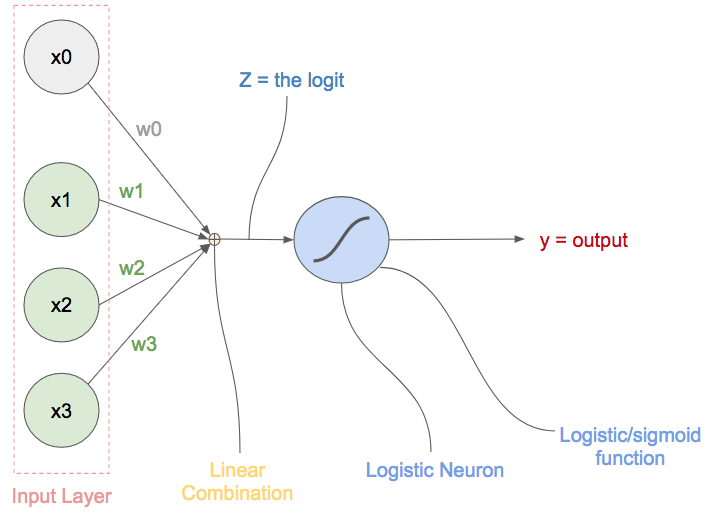

A logistic neuron computes its **logit**, which is **z**, it's total input! This is a linear combination of the bias, plus the sum over all of the input lines, of the value on an input line, $x_i$, times the weight on the input line, $w_i$. 
## $$logit = z = b + \sum_ix_iw_i$$

It then takes that total input, the logit z, and gives an output **y**, that is a smooth nonlinear function of the logit. In this case, y is going to be the sigmoid function (logistic function), with the logit z as the input.
## $$output = y = \frac{1}{1+e^{-z}}$$

We can see how the output **y** varies with it's input, the **logit**, **z**, below:

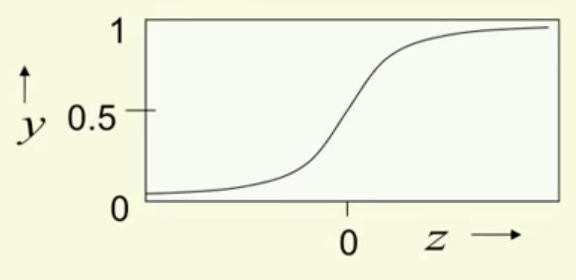

It is clear that **y** is approximately 1 when **z** is big and positive, approximately 0 when **z** is big and negative, and in between it changes smoothly and nonlinearly. The fact that it changes continuously gives it nice derivatives which make learning easy. 

## 1.2 Derivatives of Logistic Neuron
For this section note that our overall goal is to determine how the error between our output prediction, y, and target, t, changes as we change our weights. Why are we trying to find that? Well we want to change our weights so as to reduce the error between our predictions and targets. By finding how the change in weights effects the change in error, we can change our weights intelligently in order to make accurate predictions. So, mathematically wer are going to try and find:

## $$\frac{\partial E}{\partial w_i}$$

In order to learn what the best weights are and make accurate predictions, we need to find out how the output, **y**, changes as we change the weights, **w**. In order to do that we will need to determine: 
1. how the logit, **z**, changes as we change a specific weight. 
2. how the output, **y**, changes as we change the logit, **z**. 

When we are trying to figure out how changing one variable effects the the change of another, we want to use derivatives in order to to do so! 

### Derivative out Logit with respect to the weight
For number 1 above, we are trying to determine: the derivative of the logit itself, that is the total input to the logistic neuron, with respect to a weight. That is very simple to do. The logit is just a bias plus the sum over all of the input lines, of the value on the input line times the weight.

## $$z = b + \sum_ix_iw_i$$

So when we differentiate the logit with respect to $w_i$, we end up with:

## $$\frac{\partial z}{\partial w_i} = x_i$$

And similarly, the derivative of the logit with respect to $x_i$ is:

## $$\frac{\partial z}{\partial x_i} = w_i$$

### Derivative out Output with respect to the Logit
Now, for number 2 above, the derivative of the output with respect to the logit is also simple, if you express it in terms of the output! Remember, the output **y** is:

## $$y = \frac{1}{1+e^{-z}}$$

Which we can rewrite as:

## $$y = \frac{1}{1+e^{-z}} = (1+e^{-z})^{-1}$$

And to find the derivative of the output respect to the logit:

## $$\frac{dy}{dz} = \frac{-1(-e^{-z})}{(1+e^{-z})^2} = \Big(\frac{1}{1+e^{-z}}\Big)\Big(\frac{e^{-z}}{1+e^{-z}}\Big)\rightarrow$$

## $$\Big(\frac{1}{1+e^{-z}}\Big)\Big(\frac{e^{-z}}{1+e^{-z}}\Big) = y\Big(\frac{e^{-z}}{1+e^{-z}}\Big) \rightarrow$$

And we can find that:

## $$\Big(\frac{e^{-z}}{1+e^{-z}}\Big) = \frac{(1+e^{-z})-1}{1+e^{-z}} = \frac{(1+e^{-z})}{1+e^{-z}}-\frac{1}{1+e^{-z}}$$

Where:

## $$\frac{(1+e^{-z})}{1+e^{-z}}-\frac{1}{1+e^{-z}} = 1-y$$

Hence, if we plug in $1-y$ to the following equation:

## $$y\Big(\frac{e^{-z}}{1+e^{-z}}\Big) = y(1-y)$$

We end up with a final derivative of:

## $$\frac{dy}{dz} = y(1-y)$$

### Derivative of Output with respect to the Weights
Now that we have the derivative of the output with respect to the logit, and the derivative of the logit with respect to the weight, we can start to figure out the derivative of the output with respect to the weight! That is the big thing that we are trying to find right now: **how does our output, y, change as we change our weights?** The best way to do this is using the chain rule!

So, the chain rule states that in order to find the derivative of the output with respect to the weights, we need to find:

## $$\frac{\partial y}{\partial w_i} = \frac{\partial z}{\partial w_i}\frac{dy}{dz}$$

Since we have already found both $\frac{\partial z}{\partial w_i}$ and $\frac{dy}{dz}$, we can plug them in to get our result of:

## $$\frac{\partial y}{\partial w_i} = x_iy(1-y)$$

The last thing we need to find is how our error changes with respect to our output...

### Derivative of Error with respect to the Output
When we change our output, we change the amount of error in our prediction. One basic equation for error is that of least squares:

## $$Error = E = \frac{1}{2}\sum_{n \in training}(t^n - y^n)^2$$

This is equal to our squared residuals, summed over all training cases. In other words, it is the squared difference between the target, and what the neural net predicts, over all of the training cases. The half used to cancel the 2 when we differentiate. With that definition of error in mind, we want to find how the error changes as we change the output:

## $$\frac{\partial E}{\partial y} = -\sum_n(t^n-y^n)$$

### Derivative of the Error with respect to the Weights
We now have everyting we need to find the learning rule for a logistic neuron! Since we are trying to determine how the error changes as we change a weight our overall equation will look like:

## $$\frac{\partial E}{\partial w_i} = \sum_n\frac{\partial E}{\partial y^n}\frac{\partial y^n}{\partial w^i} = -\sum_nx_i^ny^n(1-y^n)(t^n-y^n) $$

This represents the sum over all of the training cases, n, of the value on an input line $x_i^n$, times the residual (the difference between the target and the output), times $y^n(1-y^n)$, which comes from the slope over the logistic function. 

---
# 2.0 Backpropagation Algorithm 
At this point it is useful to understand what the main purpose of backpropagation is, and why it is necessary. First and foremost, networks without hidden units are very limited in the input-output mappings they can model. If you add a layer of hand coded features, you can make the network much more powerful, but it is difficult and time consuming to design those features. As a note, here is what hidden units look like:

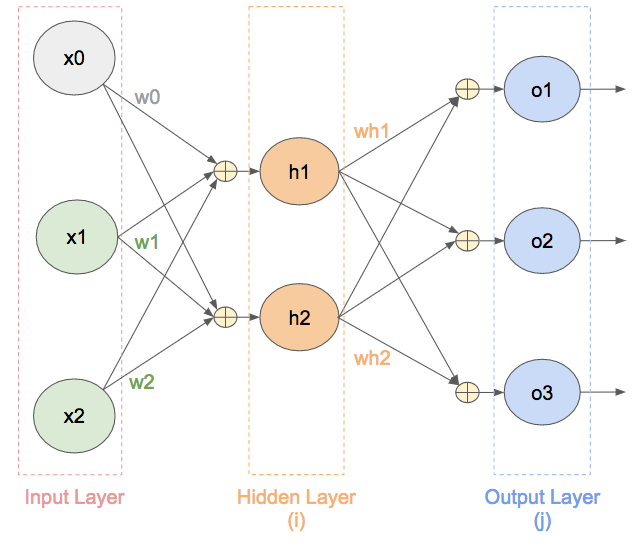

What we would ideally want, is a way of finding good features, without requiring insights into the task, or repeated trial and error where we guess some features and see how well they work. What we need is essentially to automate the loop of designing features for a particular task and seeing how well they work. 

## 2.1 The Idea behind Backpropagation
The main idea behind back propagation is that we don't know what the hidden units ought to be doing-they are called hidden units because no body is telling us what there states ought to be-but we can compute how fast the error changes as we change the activity on a particular training case. 

So, instead of using the activities of the hidden units as the desired states, we use the error derivatives with respect to activities. Since each hidden unit can effect many different output units, it can have many different effects on the error. **These effects must be combined**. 

Once we have the error derivatives for the hidden units- that is **we know how fast the error changes as we change the hidden activity on that particular training case**- it is easy to convert those error derivatives for the activities, into error derivatives for the weights coming into a hidden unit. 

## 2.2 Sketch of Backpropagation on single training case 

